<a href="https://colab.research.google.com/github/AbhiAadi/DeepLearning-MaterialDefect/blob/main/DNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values


In [3]:

# Normalize the input and target variables
x_scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
y_scaler = MinMaxScaler(feature_range=(-0.99, 0.99))
x_set = x_scaler.fit_transform(x_set)
y_set = y_scaler.fit_transform(y_set.reshape(-1, 1)).flatten()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=1/3, random_state=42)


In [ ]:
model= Sequential([
    Dense(6, activation='tanh', input_shape=(21,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(3, activation='tanh'),
    Dense(1, activation='tanh')
 ])
# ------------------------Encoder 1 --------------------------------------------
encoder1= Sequential([
    Dense(6, activation='tanh', input_shape=(21,)),
    Dense(21, activation='tanh')
])
encoder1.compile(optimizer='adam', loss= 'mse')
encoder1.fit(x_train,x_train, epochs=300, batch_size=20)
weights1=encoder1.layers[0].get_weights()

encoder1_out= Sequential([
    Dense(6, activation='tanh', input_shape=(21,))
])
encoder1_out.layers[0].set_weights(weights1)
encoder_out1=encoder1_out.predict([x_train])
print(encoder_out1.shape)
# _--------------------------Encoder 2 ----------------------------------------------

encoder2= Sequential([
    Dense(5, activation='tanh', input_shape=(6,)),
    Dense(6, activation='tanh')
])
encoder2.compile(optimizer='adam', loss= 'mse')
encoder2.fit(encoder_out1,encoder_out1, epochs=300, batch_size=20)
weights2=encoder2.layers[0].get_weights()

encoder2_out= Sequential([
    Dense(6, activation='tanh', input_shape=(21,)),
    Dense(5, activation='tanh')
])
encoder2_out.layers[0].set_weights(weights1)
encoder2_out.layers[1].set_weights(weights2)
encoder_out2=encoder2_out.predict([x_train])
print(encoder_out2.shape)


# ---------------------------Encoder 3-------------------------------------

encoder3= Sequential([
    Dense(4, activation='tanh', input_shape=(5,)),
    Dense(5, activation='tanh')
])
encoder3.compile(optimizer='adam', loss= 'mse')
encoder3.fit(encoder_out2,encoder_out2, epochs=300, batch_size=20)
weights3=encoder3.layers[0].get_weights()

encoder3_out= Sequential([
    Dense(6, activation='tanh', input_shape=(21,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh')
])
encoder3_out.layers[0].set_weights(weights1)
encoder3_out.layers[1].set_weights(weights2)
encoder3_out.layers[2].set_weights(weights3)
encoder_out3=encoder3_out.predict([x_train])
print(encoder_out3.shape)

# -------------------------------  Encoder 4-------------------------------------

encoder4= Sequential([
    Dense(3, activation='tanh', input_shape=(4,)),
    Dense(4, activation='tanh')
])
encoder4.compile(optimizer='adam', loss= 'mse')
encoder4.fit(encoder_out3,encoder_out3, epochs=300, batch_size=20)
weights4=encoder4.layers[0].get_weights()

encoder4_out= Sequential([
    Dense(6, activation='tanh', input_shape=(21,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(3, activation= 'tanh')
])
encoder4_out.layers[0].set_weights(weights1)
encoder4_out.layers[1].set_weights(weights2)
encoder4_out.layers[2].set_weights(weights3)
encoder4_out.layers[3].set_weights(weights4)
encoder_out4=encoder4_out.predict([x_train])
print(encoder_out4.shape)


# --------------------------- Encoder 5 -------------------------------


encoder5= Sequential([
    Dense(1, activation='tanh', input_shape=(3,)),
    Dense(3, activation='tanh')
])
encoder5.compile(optimizer='adam', loss= 'mse')
encoder5.fit(encoder_out4,encoder_out4, epochs=300, batch_size=20)
weights5=encoder5.layers[0].get_weights()


# ------------------------   Applying weights to model-------------------------

model.layers[0].set_weights(weights1)
model.layers[1].set_weights(weights2)
model.layers[2].set_weights(weights3)
model.layers[3].set_weights(weights4)
model.layers[4].set_weights(weights5)




In [ ]:
model.compile(optimizer='adam', loss='mse', metrics= ['mae'])
history= model.fit(x_train, y_train, epochs= 1000, validation_data=(x_test, y_test), batch_size = 20)


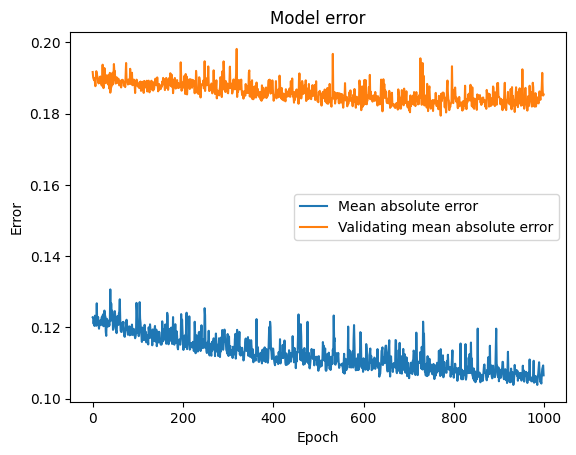

In [11]:
# Plot the training and validation loss
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validating mean absolute error')
plt.title('Model error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

6/6 [==============================] - 0s 3ms/step


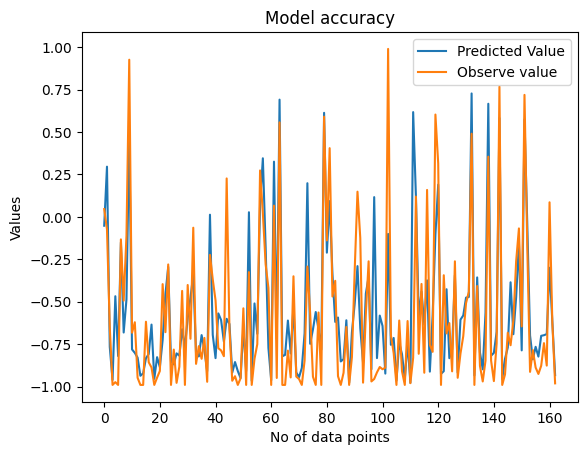

In [12]:
# Plot the Model Acuracy
plt.plot(model.predict([x_test]), label='Predicted Value')
plt.plot(y_test, label='Observe value')
plt.title('Model accuracy')
plt.xlabel('No of data points')
plt.ylabel('Values')
plt.legend()
plt.show()

SNN with PCA applied that reduce the feature from 21 to 15 and then the model is trained..

In [14]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values

In [15]:
# Define the number of components to keep after PCA
n_components = 15

# Create a PCA object with the specified number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the input data and transform the data
X_pca = pca.fit_transform(x_set)
# print(pca.explained_variance_ratio_)

# # Print the total variance explained by the selected number of components
# print('Total variance explained:', sum(pca.explained_variance_ratio_))

X_norm = MinMaxScaler(feature_range=(-0.5, 0.5))
Y_norm = MinMaxScaler(feature_range=(-0.99, 0.99))
y_set = y_set.reshape(-1,1)
# Normalize input and target variables

X_pca[:,:] = X_norm.fit_transform(X_pca[:,:])
y_scaled = Y_norm.fit_transform(y_set)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=1/3, random_state=42)

In [ ]:
# Model Architecture for DNN by appling PCA


# Define the model architecture
model= Sequential([
    Dense(6, activation='tanh', input_shape=(15,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(3, activation='tanh'),
    Dense(1, activation='tanh')
 ])
# ------------------------Encoder 1 --------------------------------------------
encoder1= Sequential([
    Dense(6, activation='tanh', input_shape=(15,)),
    Dense(15, activation='tanh')
])
encoder1.compile(optimizer='adam', loss= 'mse')
encoder1.fit(x_train,x_train, epochs=300, batch_size=20)
weights1=encoder1.layers[0].get_weights()

encoder1_out= Sequential([
    Dense(6, activation='tanh', input_shape=(15,))
])
encoder1_out.layers[0].set_weights(weights1)
encoder_out1=encoder1_out.predict([x_train])
print(encoder_out1.shape)
# _--------------------------Encoder 2 ----------------------------------------------

encoder2= Sequential([
    Dense(5, activation='tanh', input_shape=(6,)),
    Dense(6, activation='tanh')
])
encoder2.compile(optimizer='adam', loss= 'mse')
encoder2.fit(encoder_out1,encoder_out1, epochs=300, batch_size=20)
weights2=encoder2.layers[0].get_weights()

encoder2_out= Sequential([
    Dense(6, activation='tanh', input_shape=(15,)),
    Dense(5, activation='tanh')
])
encoder2_out.layers[0].set_weights(weights1)
encoder2_out.layers[1].set_weights(weights2)
encoder_out2=encoder2_out.predict([x_train])
print(encoder_out2.shape)


# ---------------------------Encoder 3-------------------------------------

encoder3= Sequential([
    Dense(4, activation='tanh', input_shape=(5,)),
    Dense(5, activation='tanh')
])
encoder3.compile(optimizer='adam', loss= 'mse')
encoder3.fit(encoder_out2,encoder_out2, epochs=300, batch_size=20)
weights3=encoder3.layers[0].get_weights()

encoder3_out= Sequential([
    Dense(6, activation='tanh', input_shape=(15,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh')
])
encoder3_out.layers[0].set_weights(weights1)
encoder3_out.layers[1].set_weights(weights2)
encoder3_out.layers[2].set_weights(weights3)
encoder_out3=encoder3_out.predict([x_train])
print(encoder_out3.shape)

# -------------------------------  Encoder 4-------------------------------------

encoder4= Sequential([
    Dense(3, activation='tanh', input_shape=(4,)),
    Dense(4, activation='tanh')
])
encoder4.compile(optimizer='adam', loss= 'mse')
encoder4.fit(encoder_out3,encoder_out3, epochs=300, batch_size=20)
weights4=encoder4.layers[0].get_weights()

encoder4_out= Sequential([
    Dense(6, activation='tanh', input_shape=(15,)),
    Dense(5, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(3, activation= 'tanh')
])
encoder4_out.layers[0].set_weights(weights1)
encoder4_out.layers[1].set_weights(weights2)
encoder4_out.layers[2].set_weights(weights3)
encoder4_out.layers[3].set_weights(weights4)
encoder_out4=encoder4_out.predict([x_train])
print(encoder_out4.shape)


# --------------------------- Encoder 5 -------------------------------


encoder5= Sequential([
    Dense(1, activation='tanh', input_shape=(3,)),
    Dense(3, activation='tanh')
])
encoder5.compile(optimizer='adam', loss= 'mse')
encoder5.fit(encoder_out4,encoder_out4, epochs=300, batch_size=20)
weights5=encoder5.layers[0].get_weights()


# ------------------------   Applying weights to model-------------------------

model.layers[0].set_weights(weights1)
model.layers[1].set_weights(weights2)
model.layers[2].set_weights(weights3)
model.layers[3].set_weights(weights4)
model.layers[4].set_weights(weights5)





In [ ]:
model.compile(optimizer='adam', loss='mse', metrics= ['mae'])
history= model.fit(x_train, y_train, epochs= 1000, validation_data=(x_test, y_test), batch_size = 20)

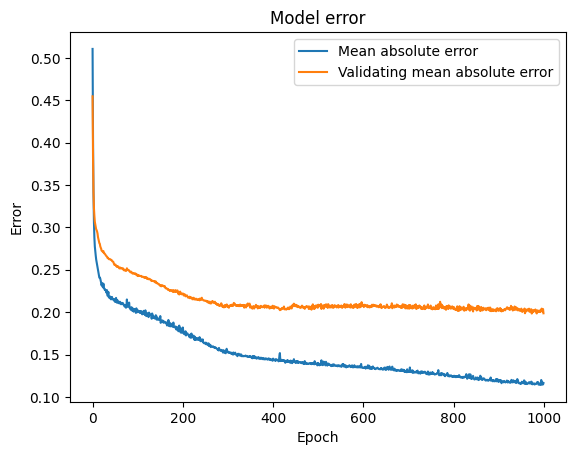

In [20]:
# Plot the training and validation loss
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validating mean absolute error')
plt.title('Model error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

6/6 [==============================] - 0s 3ms/step


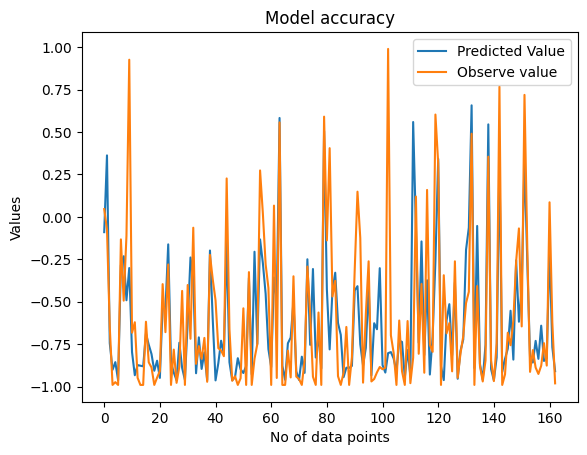

In [21]:
# Plot the Model Acuracy
plt.plot(model.predict([x_test]), label='Predicted Value')
plt.plot(y_test, label='Observe value')
plt.title('Model accuracy')
plt.xlabel('No of data points')
plt.ylabel('Values')
plt.legend()
plt.show()